In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Dropping the rows which are not needed for prediction
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='Geography', ylabel='count'>

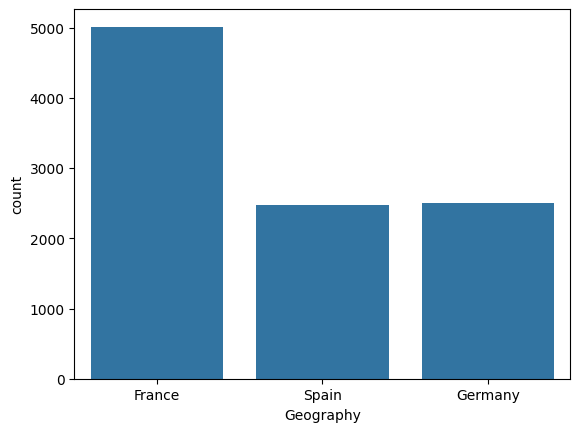

In [ ]:
sns.countplot(x='Geography',data=df)

In [ ]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [ ]:
df_final = pd.get_dummies(df,drop_first=True)

In [ ]:
df_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
x = df_final.drop('Exited', axis=1)
y = df_final['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,  random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Creating the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann_clf = Sequential()
# input layer
ann_clf.add(Dense(activation = 'relu', input_dim=11, units=6, kernel_initializer='uniform'))

In [ ]:
#second hidden layer
ann_clf.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform'))

# output Layers
ann_clf.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform'))

# model compile
ann_clf.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model Train
ann_clf.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=160)

Epoch 1/160
168/168 [==============================] - 1s 4ms/step - loss: 0.6063 - accuracy: 0.7962 - val_loss: 0.4744 - val_accuracy: 0.7910
Epoch 2/160
168/168 [==============================] - 1s 3ms/step - loss: 0.4465 - accuracy: 0.7962 - val_loss: 0.4462 - val_accuracy: 0.7910
Epoch 3/160
168/168 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7962 - val_loss: 0.4414 - val_accuracy: 0.7910
Epoch 4/160
168/168 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.7962 - val_loss: 0.4389 - val_accuracy: 0.7910
Epoch 5/160
168/168 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7962 - val_loss: 0.4361 - val_accuracy: 0.7910
Epoch 6/160
168/168 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.7962 - val_loss: 0.4339 - val_accuracy: 0.7910
Epoch 7/160
168/168 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.7962 - val_loss: 0.4325 - val_accuracy: 0.7910

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
8000/32

250.0

In [ ]:
8000/50

160.0

In [ ]:
'''
data size = 10,000
batch = 100
epochs = 10

10000/100 = 100 -- iteration per epoch

100 -- iteration per epoch * 10 = 1000
'''


'\ndata size = 10,000\nbatch = 100\nepochs = 10\n\n10000/100 = 100 -- iteration per epoch\n\n100 -- iteration per epoch * 10 = 1000\n'

Train acc ~ Testing acc (Traing)
Train acc >> Testing acc (Overfit)
Train acc , Test (low) (Underfit)

In [ ]:
# Overfit---> High Variance
# Underfit-->High Bias
# Low Variance and Low Bias(Generalize model)
'''
HL   acc_error
5        70
10       72
20       75
.
.
.
.
200      (overfit)
'''

'\nHL   acc_error\n5        70\n10       72\n20       75\n.\n.\n.\n.\n200      (overfit)\n'

In [ ]:
y_pred=ann_clf.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[0.10563923],
       [0.08050878],
       [0.40696153],
       ...,
       [0.56161064],
       [0.03264979],
       [0.13220797]], dtype=float32)

In [ ]:
y_pred=(y_pred>0.5)
# fixing the thresold value=0.5

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

In [ ]:
cm=cm(y_test,y_pred)
print(cm)

[[1537   70]
 [ 252  141]]


In [ ]:
cr=cr(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.67      0.36      0.47       393

    accuracy                           0.84      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000

